In [94]:
import pandas as pd
import numpy as np
import partial_dependence as pdp
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.svm import SVC 

from sklearn.datasets import load_iris

%matplotlib inline 

In [60]:
iris = load_iris()
X = iris.data
Y = iris.target
Y_names = iris.target_names

In [113]:
gbm = GBM(n_estimators = 20)
rf = RandomForest(n_estimators = 20)
svm = SVC(C = 1, probability=True, kernel = 'poly')

Y = Y == 1

gbm.fit(X, Y)
rf.fit(X, Y)
svm.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
help(pdp.plot_partial_dependences)

Help on function plot_partial_dependences in module partial_dependence:

plot_partial_dependences(clf, data, n_plot_cols=3, feature_names=None, cols=None, percentiles=(5, 95), cluster=True, n_clusters=100, n_points=100, logit=False, show_progress=True, verbose=False)
    Plots partial dependences of all features.
    
    Plots the single partial dependences of all columsn in X. 
    
    
    Parameters
    ----------
    
    clf : Sklean classifier class,
        A fitted sklearn classifier object
        
    data : Numpy array of data,
        Numpy array containing columns as features and 
        rows as examples
        
    feature_names : List of strings, 
        Column names used in plots. 
        
    cols : List of ints, 
        Features to compute and plot partial dependence over. 
    
    percentiles : (max, min) range tuple, default = (5, 95),
        Range for cols to be computed over, given in percentiles
        of distributions. 
        
    cluster : Boolean, 

## Individual Partial Dependence Plots 

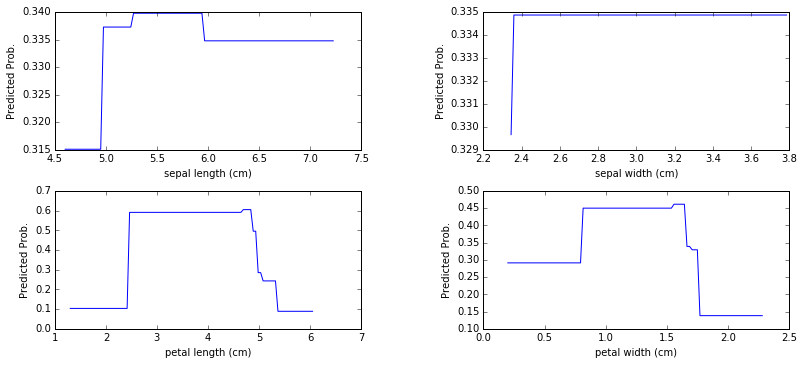

In [91]:
#GBM
mpl.rcParams['figure.figsize'] = (12,8)

_ = pdp.plot_partial_dependences(gbm, X, feature_names = iris.feature_names, 
                                 cluster = False, n_plot_cols = 2,
                                 show_progress = False)


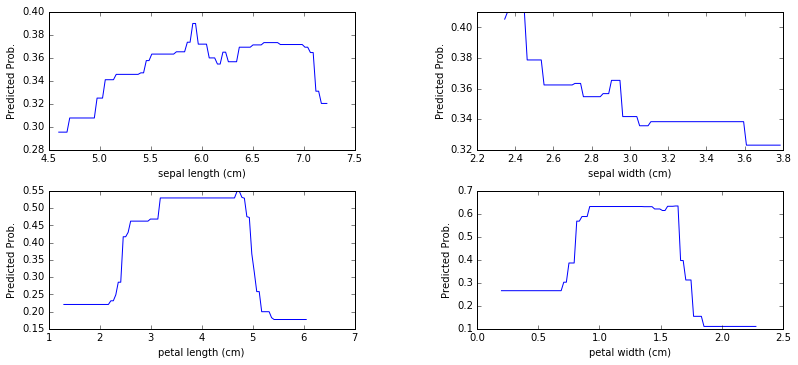

In [136]:
#Random Forest 
mpl.rcParams['figure.figsize'] = (12,8)
_ = pdp.plot_partial_dependences(rf, X, feature_names = iris.feature_names, 
                                 cluster = False,  n_plot_cols = 2,
                                 show_progress = False)
plt.savefig('Random_forest_single_partial_dependence_plots.png')

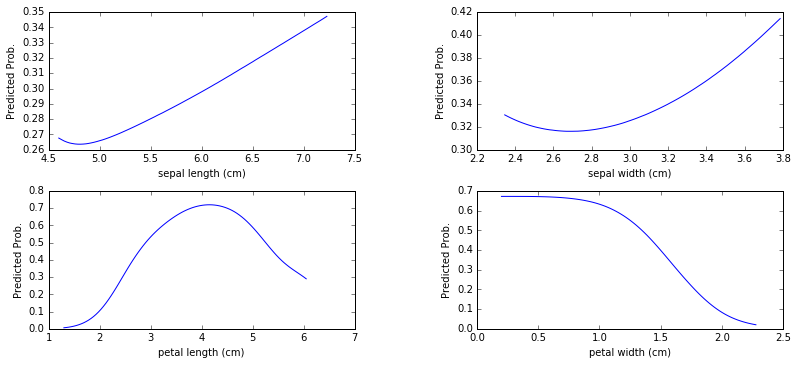

In [114]:
#SVM
mpl.rcParams['figure.figsize'] = (12,8)
_ = pdp.plot_partial_dependences(svm, X, feature_names = iris.feature_names, 
                                 cluster = False,  n_plot_cols = 2,
                                 show_progress = False)

## Pair Partial Dependence Plots

In [134]:
Z = pdp.partial_dependence(rf, X, [1,3], 
                            cluster = False,
                            mesh_grid_output = True, 
                            show_progress = False)

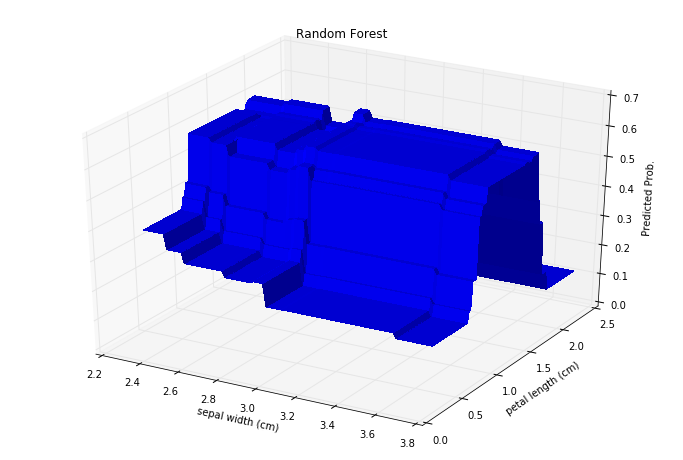

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(*Z, rstride=1, cstride=1, linewidth=0, antialiased=False)
ax.set_title('Random Forest')
ax.set_xlabel(iris.feature_names[1])
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel('Predicted Prob.')

plt.savefig('Random_forest_2d_partial_dependence_plot.png')

In [122]:
Z = pdp.partial_dependence(svm, X, [2,3], 
                            cluster = False,
                            mesh_grid_output = True, 
                            show_progress = False)

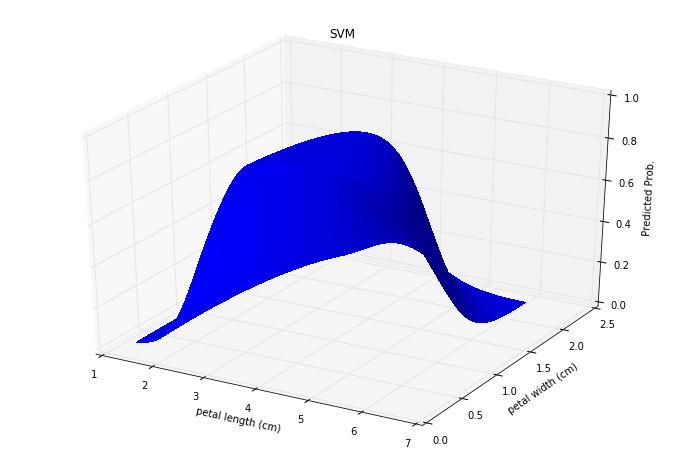

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(*Z, rstride=1, cstride=1, linewidth=0, antialiased=False)
ax.set_title('SVM')
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_zlabel('Predicted Prob.')

## Interaction Plots 

In [129]:
Z = pdp.partial_interaction(rf, X, [1,2], 
                            cluster = False,
                            mesh_grid_output = True, 
                            show_progress = False)

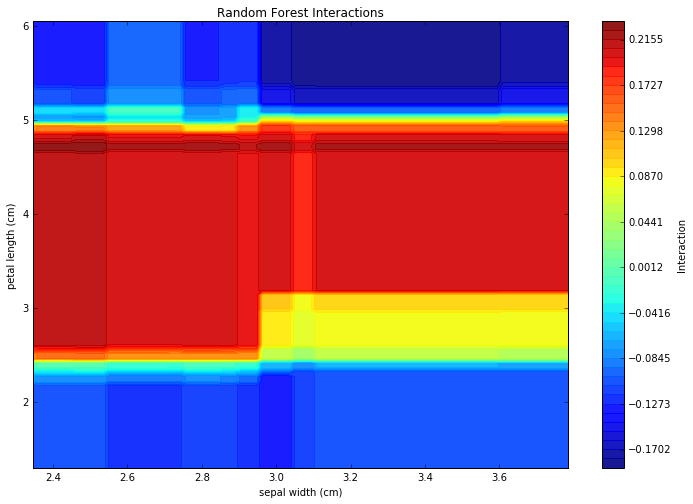

In [130]:
mpl.rcParams['figure.figsize'] = (12,8)
fig = plt.figure()
ax = fig.add_subplot(111)

Z_level = np.linspace(Z[-1].min(), Z[-1].max(), 50)

CS = ax.contourf(*Z, levels=Z_level, vmax=Z_level[-1], vmin=Z_level[0], alpha=0.9)
ax.set_xlabel(iris.feature_names[1])
ax.set_ylabel(iris.feature_names[2])
ax.set_title('Random Forest Interactions')

cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Interaction')

In [132]:
Z = pdp.partial_interaction(svm, X, [2,3], 
                            cluster = False,
                            mesh_grid_output = True, 
                            show_progress = False)

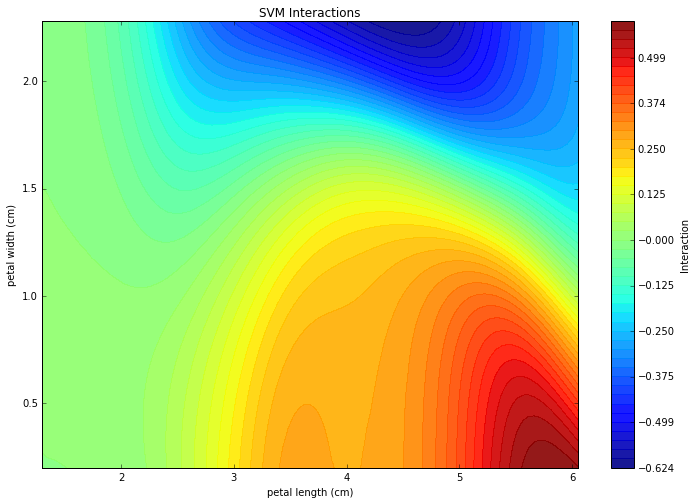

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)

Z_level = np.linspace(Z[-1].min(), Z[-1].max(), 50)

CS = ax.contourf(*Z, levels=Z_level, vmax=Z_level[-1], vmin=Z_level[0], alpha=0.9)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_title('SVM Interactions')

cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Interaction')
plt.savefig('SVM_interaction_plot.png')